# Machine Learning: Assignment 3
## Decision Tree and Naive Bayes classification methods  (max. 10p)

In [1]:
# Write Your information in here

student_name = 'Burak Dogan'
student_id = "AB0971"

In this assignment, we will build a diabetes prediction model.

We try to predict the occurrence of diabetes using the following three ML classification methods:
1. Decision Tree
2. Gaussian Naive Bayes
3. kNN

**Dataset**:

You can download the data from the following link: [https://www.kaggle.com/uciml/pima-indians-diabetes-database](https://www.kaggle.com/uciml/pima-indians-diabetes-database)

Description of the data: *The objective of the dataset is to diagnostically predict whether a patient has diabetes, based on certain diagnostic measurements included in the dataset.
Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.*


## Assignment 3.1: Data preprocessing (1 p)

First, let's load the required Pima Indian Diabetes dataset into Pandas as CSV data.
You should use and name all the columns and drop the `label` column.

In [2]:
# TODO: preprocessing data
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

df = pd.read_csv('diabetes.csv')
df.columns = ['Pregnancies',  'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
# There is no label column. Assuming "Outcome" is the label.
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


## Assignment 3.2: Decision Tree Classifier (3 p)

Try to predict the `label` value of the feature using other features with
1. Decision Tree,
2. Gaussian Naive Bayes and
3. kNN methods.

Split the data into training data and test data by split *80%/20%*.

Print the accuracy of the prediction, the confusion matrix and
how much different features affect the predicted variable according to the model (the importance of features).

Select the tree most important explanatory variables and print a scatter plot from them.

First implement the **Decision Tree classifier**.
* Let's divide the data into training and testing data sets and scale the numerical data.
* Then train with training data and test with testing data and get the accuracy of the model.

In [3]:
# TODO: Split the dataset (80/20%).
X = df.drop(columns=['Outcome'])
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Build a machine learning model with Decision Tree and test the model.

In [4]:
# TODO: Build and test the Model

# Scale the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_scaled, y_train)
y_pred = dt_classifier.predict(X_test_scaled)


# TODO: Print accuracy of the model
acc = accuracy_score(y_test, y_pred)

print(f'Accuracy of Decision Tree: {round(acc*100, 1)} %.')

Accuracy of Decision Tree: 74.7 %.


Let's 
* show the confusion matrix and
* print the importance of features.

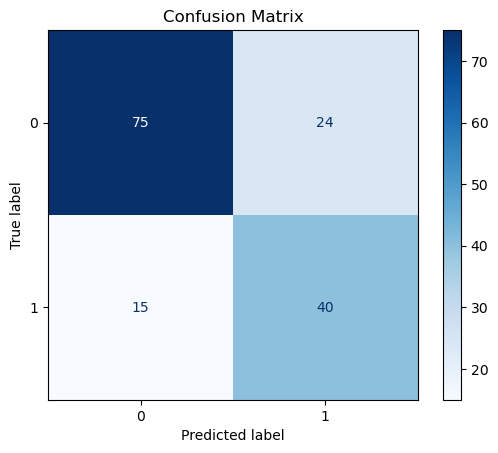

In [5]:
# TODO: the confusion matrix
conf_matrix_decisiontree = confusion_matrix(y_test, y_pred)

# Show confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_decisiontree, display_labels=dt_classifier.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()

In [8]:
# TODO: print the importance of features
feature_importances = dt_classifier.feature_importances_
for feature, importance in zip(X_train.columns, feature_importances): # zip combines two or more iterables element-wise
    print(f"{feature}: {importance}")

Pregnancies: 0.05748152773441196
Glucose: 0.31422474122426247
BloodPressure: 0.14767907428520033
SkinThickness: 0.061163784758076475
Insulin: 0.06625279117713799
BMI: 0.17070034756618227
DiabetesPedigreeFunction: 0.08328237479569757
Age: 0.09921535845903089


Try to do some suitable visualization of the data.

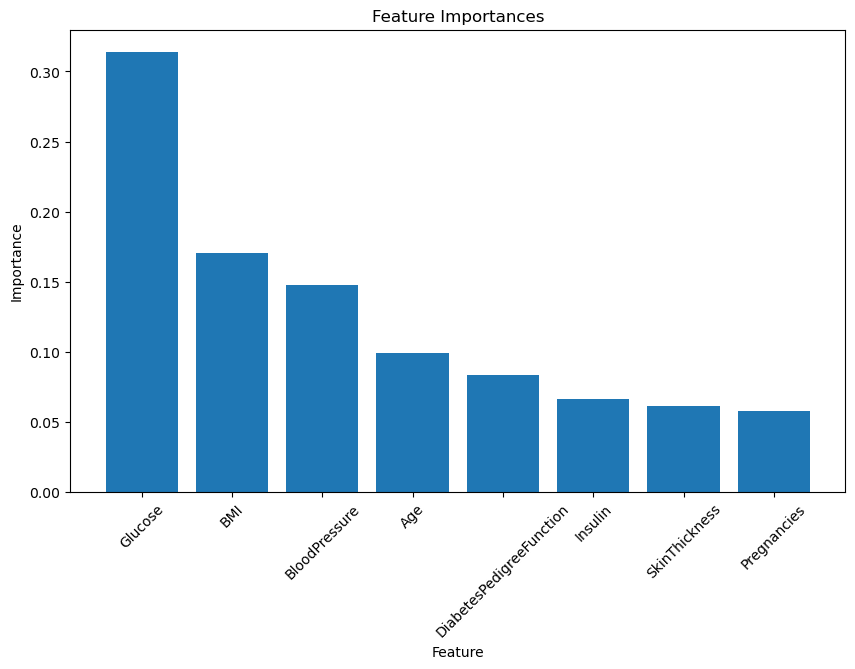

In [9]:
# TODO: Visualization
sorted_idx = feature_importances.argsort()[::-1]
features_sorted = X_train.columns[sorted_idx]
importances_sorted = feature_importances[sorted_idx]

plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), importances_sorted, align="center")
plt.xticks(range(X_train.shape[1]), features_sorted, rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.show()

## Assignment 3.3: Naive Gaussian classifier (2 p)
Second implement of a machine learning classification model is the **Naive Gaussian classifier**.

* Let's divide the data into training and testing data sets and scale the numerical data.
* Then train with training data and test with testing data and get the accuracy of the model.



In [10]:
from sklearn.naive_bayes import GaussianNB

# TODO: Split the dataset (80/20%).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TODO: Build and test the Model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Naive Gaussian classifier
naive_gaussian_classifier = GaussianNB()
naive_gaussian_classifier.fit(X_train_scaled, y_train)

# TODO: Print accuracy of the model
y_pred = naive_gaussian_classifier.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)

print(f'Accuracy of Naive Bayes: {round(acc*100, 1)} %.')

Accuracy of Naive Bayes: 76.6 %.


Now let's do Processing of results (naive Gaussian method) and show confusion matrix.

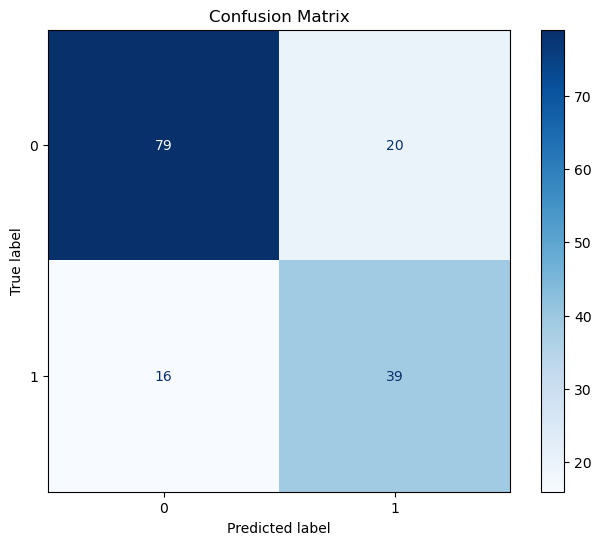

In [11]:
# TODO: the confusion matrix
conf_matrix_gauss = confusion_matrix(y_test, y_pred)

disp_ngauss = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_gauss, display_labels=naive_gaussian_classifier.classes_)
# print confusion matrix
plt.figure(figsize=(8, 6))
disp_ngauss.plot(cmap="Blues", values_format="d", ax=plt.gca())
plt.title('Confusion Matrix')
plt.show()


## Assignment 3.4: kNN (2 p)

The third implement of a machine learning classification model is the **kNN classifier**.

* Let's divide the data into training and testing data sets and scale the numerical data.
* Then train with training data and test with testing data and get the accuracy of the model.

In [13]:
from sklearn.neighbors import KNeighborsClassifier

# TODO: Split the dataset (80/20%).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TODO: Build and test the Model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

k_value = 3 # number of neighbours
knn_classifier = KNeighborsClassifier(n_neighbors=k_value)
knn_classifier.fit(X_train_scaled, y_train)
y_pred = knn_classifier.predict(X_test_scaled)

# TODO: Print accuracy of the model
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy of kNN: {round(acc*100, 1)} %.')

Accuracy of kNN: 70.8 %.


Processing of results (kNN method) and show confusion matrix.

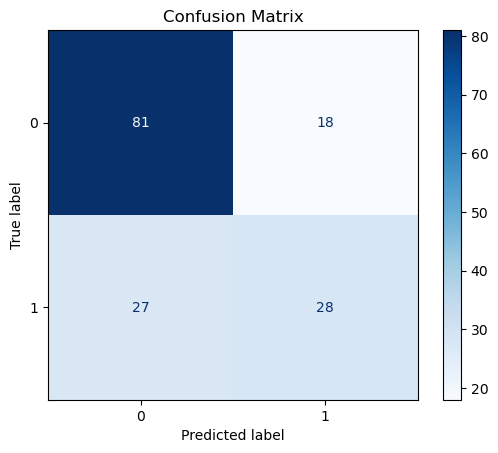

In [15]:
# TODO: show confusion matrix
conf_matrixknn = confusion_matrix(y_test, y_pred, labels=knn_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrixknn, display_labels=knn_classifier.classes_)

# print confusion matrix
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

## Assignment 3.5: Plotting the ROC curve (2p)

Also draw the ROC curves (with AUC) with three classification methods implemented:
1. decision tree
2. Gaussian
3. kNN

In [30]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

# TODO: ROC for decision tree
y_dt_score = dt_classifier.predict_proba(X_test_scaled)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_dt_score[:, 1])
roc_auc_dt = auc(fpr_dt, tpr_dt)

In [31]:
# TODO: ROC for Naive Gaussian
y_gnb_score = naive_gaussian_classifier.predict_proba(X_test_scaled)[:, 1]
fpr_gnb, tpr_gnb, _ = roc_curve(y_test, y_gnb_score)
roc_auc_gnb = auc(fpr_gnb, tpr_gnb)

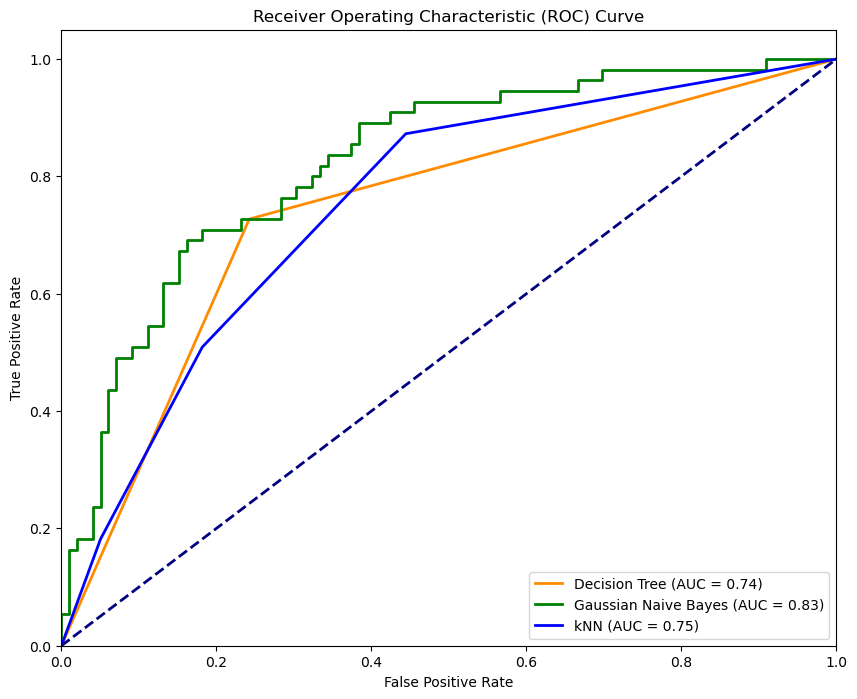

In [32]:
# TODO: ROC for kNN
y_knn_score = knn_classifier.predict_proba(X_test_scaled)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_knn_score)
roc_auc_knn = auc(fpr_knn, tpr_knn)


# Plotting ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_gnb, tpr_gnb, color='green', lw=2, label=f'Gaussian Naive Bayes (AUC = {roc_auc_gnb:.2f})')
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label=f'kNN (AUC = {roc_auc_knn:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Conclusion
* TODO: Write comparison and conclusion of the results you got.

* **PLEASE WRITE YOUR ANSWER HERE!**

### Fix for the curves:
I was using the X_test instead of X_test_scaled. That was the reason they were not right.

### Important Features

According to Decision Tree model, most important feature for diabetes is **Glucose** followed by BMI and blood pressure.

### Comparison'
For comparison, AUC can be used. AUC closer to 1 indicates model has good class separability, 0.5 model no class separation capacity and near 0 is worst class separation capacity.

From the plots and AUC scores, Gaussian Naive Bayes (AUC = 0.83)  did better than Decision Tree and kNN models.
- Decision Tree (AUC = 0.74) and kNN (AUC = 0.75) performed similar. 


## Extra Assignment: Other ML Methods

Can you find any other suitable ML classification methods which is better that these three with this dataset?
Of course, it needs some implementation to try out your solution and comparison of the results.

#### Why? 

Why to do this extra assignments if you cannot get any extra points? 

*Some ML models are taught in the course, but the most important thing is to create a basis for competence in the course and to find new, better solutions if necessary.
In particular, data analytics and artificial intelligence are developing rapidly, so applying the new methods is important.* 